# Universal Approximation Theorem

This theorem states that a neural network with two layers (i.e., one hidden layer and one output layer), given enough neurons in the hidden layer and appropriate activation functions, can approximate any continuous function on a compact domain to an arbitrary level of precision.
This means that, in theory, a two-layer neural network can represent any continuous function, which is a fundamental result in the field of neural networks and machine learning.

In this project, we will attempt to test this theory and see if the model we create will be able to approximate any fourth-degree function 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Setting Up data for the non-linear function :

### 1.1 Function:


Here we define variables as but feel free to modifie it :

$$f(x) = x_3 X^3 + x_2 X^2 + x_1 X + x_0$$

In [ ]:
x0=-1
x1=-1
x2=2
x3=2

### 1.2 The Data :

##### 1.2.1 X data :

In [3]:
#Create the X and the Y data
X = torch.arange(-2,2,0.04).view(-1,1)
# 100 values from -2 to 2 with a step of 0.04
X[:3],X[-3:],X.size()



(tensor([[-2.0000],
         [-1.9600],
         [-1.9200]]),
 tensor([[1.8800],
         [1.9200],
         [1.9600]]),
 torch.Size([100, 1]))

#### 1.2.2 The Y data :

In [4]:
Y = x3*X**3 +x2*X**2 +x1*X +x0
Y.size()

torch.Size([100, 1])

#### 1.3 Noise :

Lets create some noise to make our model more bullet proof

In [5]:
noise=torch.randn(X.size())
Y=Y + 0.2*noise
Y[:5]

tensor([[-6.8047],
        [-5.8249],
        [-5.8787],
        [-5.4424],
        [-4.5618]])

### 1.4 plot the data :

Let's print it into something that we can visualy understand :

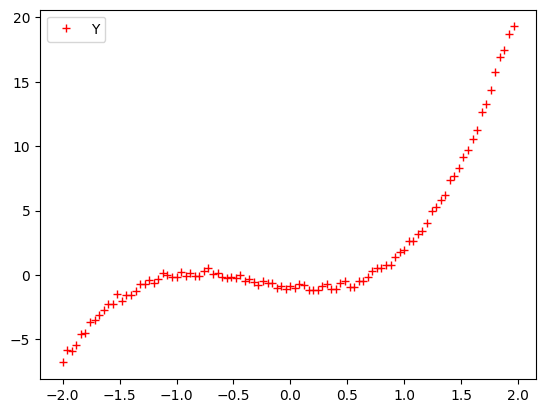

In [6]:
plt.plot(X.numpy(),Y.numpy(), "r+" , label='Y')
plt.legend()
plt.show()

## 2 Create a model  
It's  now time to create a model able to understand the tendency of our data

### 2.1 Create the neuronal network

In [7]:
from torch import nn

#here we create an ANN with 2layer one output and one inupt 

class NonLinearModel(nn.Module):
    #we use the variable n to set up the number of neurons 
    def __init__(self, n):
        super(NonLinearModel, self).__init__()
        self.linear1 = nn.Linear(1, n)
        #ReLu is our non linear activation function
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(n, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

Let's create an instance of our model

In [8]:
model=NonLinearModel(50)

### 2.2 Optimzer and loss function

Time to define an optimizer and a loss function to improve our model biais and weight

In [9]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.0001)
lossfn= nn.MSELoss()

### 2.3 Model training loop 

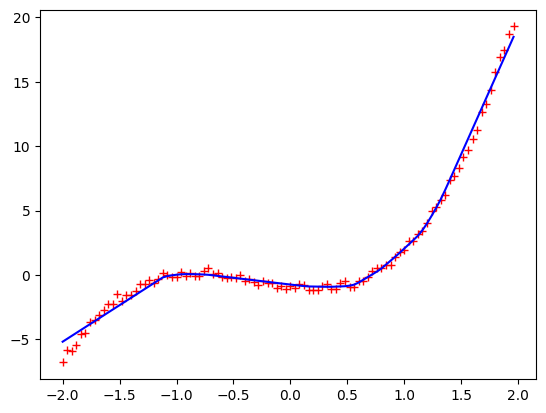

Epoch 0: Training loss: 0.6934604048728943
Epoch 10: Training loss: 0.6773822903633118
Epoch 20: Training loss: 0.6617006659507751
Epoch 30: Training loss: 0.6464572548866272
Epoch 40: Training loss: 0.631527841091156
Epoch 50: Training loss: 0.6173841953277588
Epoch 60: Training loss: 0.6035755276679993
Epoch 70: Training loss: 0.5889273285865784
Epoch 80: Training loss: 0.575367271900177
Epoch 90: Training loss: 0.562162458896637
Epoch 100: Training loss: 0.549371063709259
Epoch 110: Training loss: 0.5365675091743469
Epoch 120: Training loss: 0.5238073468208313
Epoch 130: Training loss: 0.511814534664154
Epoch 140: Training loss: 0.5002439022064209
Epoch 150: Training loss: 0.48904556035995483
Epoch 160: Training loss: 0.4785834550857544
Epoch 170: Training loss: 0.46837279200553894
Epoch 180: Training loss: 0.45835229754447937
Epoch 190: Training loss: 0.44877487421035767


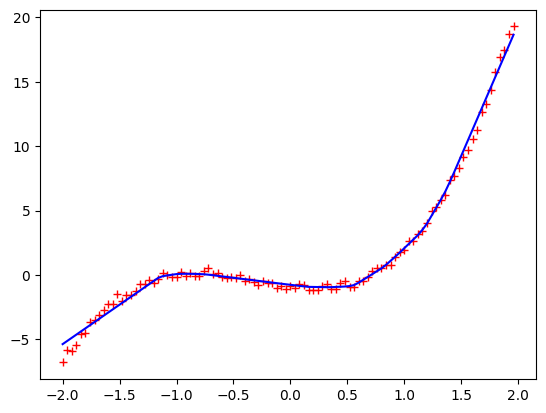

Epoch 200: Training loss: 0.4392302930355072
Epoch 210: Training loss: 0.4298533499240875
Epoch 220: Training loss: 0.42041677236557007
Epoch 230: Training loss: 0.4111485183238983
Epoch 240: Training loss: 0.4022037088871002
Epoch 250: Training loss: 0.3935151994228363
Epoch 260: Training loss: 0.38503751158714294
Epoch 270: Training loss: 0.37551289796829224
Epoch 280: Training loss: 0.36717697978019714
Epoch 290: Training loss: 0.3592683970928192
Epoch 300: Training loss: 0.3516426980495453
Epoch 310: Training loss: 0.3442487418651581
Epoch 320: Training loss: 0.3370639979839325
Epoch 330: Training loss: 0.33087158203125
Epoch 340: Training loss: 0.3244084417819977
Epoch 350: Training loss: 0.3181079924106598
Epoch 360: Training loss: 0.31244903802871704
Epoch 370: Training loss: 0.30705010890960693
Epoch 380: Training loss: 0.3009192645549774
Epoch 390: Training loss: 0.29491862654685974


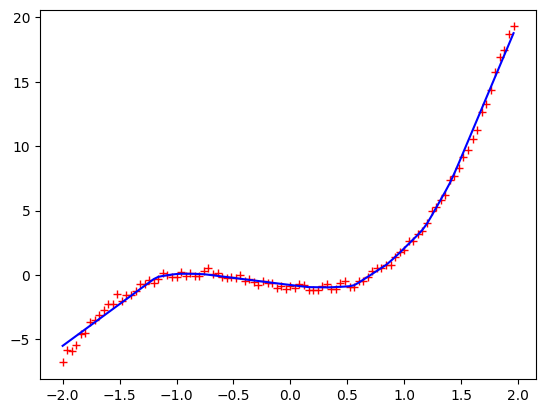

Epoch 400: Training loss: 0.28905224800109863
Epoch 410: Training loss: 0.2833016514778137
Epoch 420: Training loss: 0.2776470184326172
Epoch 430: Training loss: 0.27209317684173584
Epoch 440: Training loss: 0.2666308879852295
Epoch 450: Training loss: 0.2609686553478241
Epoch 460: Training loss: 0.25561782717704773
Epoch 470: Training loss: 0.25036826729774475
Epoch 480: Training loss: 0.24526003003120422
Epoch 490: Training loss: 0.2399895042181015
Epoch 500: Training loss: 0.23502397537231445
Epoch 510: Training loss: 0.23012681305408478
Epoch 520: Training loss: 0.2255057841539383
Epoch 530: Training loss: 0.22106792032718658
Epoch 540: Training loss: 0.216736301779747
Epoch 550: Training loss: 0.2139570713043213
Epoch 560: Training loss: 0.2103428691625595
Epoch 570: Training loss: 0.20658083260059357
Epoch 580: Training loss: 0.20277027785778046
Epoch 590: Training loss: 0.19890162348747253


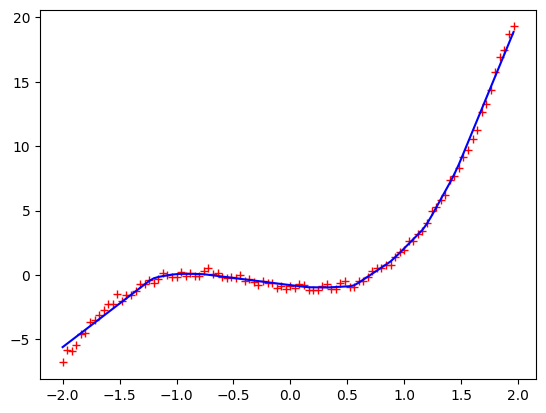

Epoch 600: Training loss: 0.19507528841495514
Epoch 610: Training loss: 0.19128943979740143
Epoch 620: Training loss: 0.18700748682022095
Epoch 630: Training loss: 0.1833191066980362
Epoch 640: Training loss: 0.17990361154079437
Epoch 650: Training loss: 0.1764994114637375
Epoch 660: Training loss: 0.1726883351802826
Epoch 670: Training loss: 0.1690286248922348
Epoch 680: Training loss: 0.16574959456920624
Epoch 690: Training loss: 0.1621246188879013
Epoch 700: Training loss: 0.15869468450546265
Epoch 710: Training loss: 0.1548057347536087
Epoch 720: Training loss: 0.15135805308818817
Epoch 730: Training loss: 0.14820314943790436
Epoch 740: Training loss: 0.14507129788398743
Epoch 750: Training loss: 0.1418033391237259
Epoch 760: Training loss: 0.13879705965518951
Epoch 770: Training loss: 0.1362943798303604
Epoch 780: Training loss: 0.13407133519649506
Epoch 790: Training loss: 0.13144026696681976


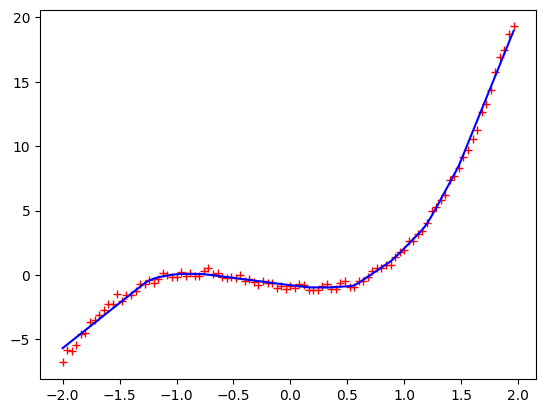

Epoch 800: Training loss: 0.12876956164836884
Epoch 810: Training loss: 0.12614929676055908
Epoch 820: Training loss: 0.12349563091993332
Epoch 830: Training loss: 0.1208144798874855
Epoch 840: Training loss: 0.11827686429023743
Epoch 850: Training loss: 0.11578565090894699
Epoch 860: Training loss: 0.11331581324338913
Epoch 870: Training loss: 0.11091198772192001
Epoch 880: Training loss: 0.10856661200523376
Epoch 890: Training loss: 0.10628857463598251
Epoch 900: Training loss: 0.10354556888341904
Epoch 910: Training loss: 0.10105416178703308
Epoch 920: Training loss: 0.09876444935798645
Epoch 930: Training loss: 0.0965922400355339
Epoch 940: Training loss: 0.09450281411409378
Epoch 950: Training loss: 0.09248611330986023
Epoch 960: Training loss: 0.09054280817508698
Epoch 970: Training loss: 0.08863035589456558
Epoch 980: Training loss: 0.08678439259529114
Epoch 990: Training loss: 0.08491338044404984


In [12]:
epoch = 1000 
LOSS= []

def train(epochs):
    for epoch in range(epochs) :
        preds=model(X)
        loss=lossfn(preds,Y)
        LOSS.append(loss.item())

        for x,y in zip(X,Y):
            predsf=model(x)
            lossf=lossfn(predsf, y)
            optimizer.zero_grad()
            lossf.backward()
            optimizer.step()

        preds = model(X)
        if epoch%200==0:
            plt.close('all')
            plt.figure(epoch)
            plt.plot(X.numpy(), Y.numpy(),'r+', label='Y')
            plt.plot(X.numpy(), preds.detach().numpy(), 'b-')
            plt.show()
        if epoch%10==0:
             print(f'Epoch {epoch}: Training loss: {lossf}')
        
train(epoch)



## 3 Visualize our model progression :

using plot we will visualize how fast our model learn and progress

Text(33.847222222222214, 0.5, 'LOSS')

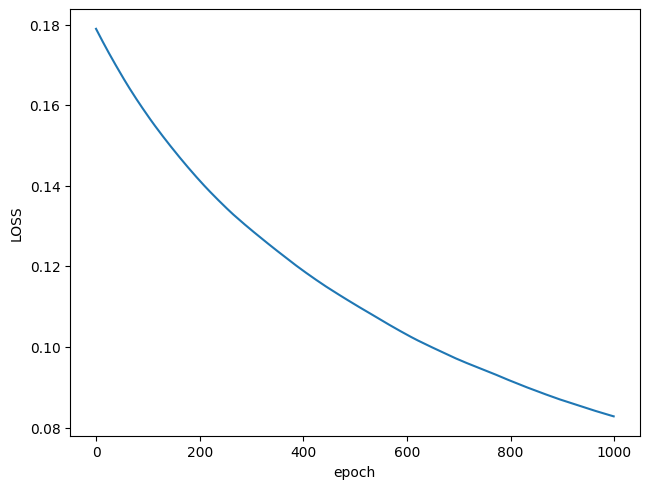

In [13]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("epoch")
plt.ylabel("LOSS")

This model is able to understand a really simple third or fouth degree non lienar system. 
For a more complex model we would need more neurons to permit a total understanding of coeficients and to follow the curve efficiently